# Data Science Training​
## Default of credit card clients Data Set Project​

#### Upload data set

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale 

In [2]:
df = pd.read_csv('/home/gmelao/Desktop/default-of-credit-card-clients.csv')
df.columns = df.iloc[0]
df.drop(0, inplace = True)
df.set_index('ID', inplace = True)
pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 24)

#### Features and types

In [3]:
df.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

###  

### Useful Info

Gender (1 = male; 2 = female)

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


##  

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df[['BILL_AMT1', 'PAY_AMT1']].head()

,BILL_AMT1,PAY_AMT1
ID,,
1,3913,0
2,2682,0
3,29239,1518
4,46990,2000
5,8617,2000


In [6]:
df[['BILL_AMT2', 'PAY_AMT2']].head()

,BILL_AMT2,PAY_AMT2
ID,,
1,3102,689
2,1725,1000
3,14027,1500
4,48233,2019
5,5670,36681


#### FIrst data treatment

In [7]:
df = df.apply(lambda df: pd.Series(map(float, df)))

In [8]:
df.dtypes

0
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month    float64
dtype: object

In [9]:
df_no_cats = df.drop(['SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month'], axis=1)
df_no_cats.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
df_cats = df[['SEX', 'MARRIAGE', 'EDUCATION', 'default payment next month']].astype('category')
df_cats.describe()

,SEX,MARRIAGE,EDUCATION,default payment next month
count,30000.0,30000.0,30000.0,30000.0
unique,2.0,4.0,7.0,2.0
top,2.0,2.0,2.0,0.0
freq,18112.0,15964.0,14030.0,23364.0


### Data Quality

#### Uniqueness
Verify if duplicated values exists


In [13]:
df2 = df_no_cats.apply(lambda df: df.duplicated(), axis=1)
df2.sum()

0
LIMIT_BAL        0
AGE              0
PAY_0            0
PAY_2        23136
PAY_3        25005
PAY_4        26043
PAY_5        26808
PAY_6        27264
BILL_AMT1      303
BILL_AMT2     3022
BILL_AMT3     3718
BILL_AMT4     4314
BILL_AMT5     4790
BILL_AMT6     5300
PAY_AMT1      8453
PAY_AMT2     10590
PAY_AMT3     11708
PAY_AMT4     13264
PAY_AMT5     14801
PAY_AMT6     11707
dtype: int64

In [62]:
df.groupby('PAY_6').size()

PAY_6
-2.0     4895
-1.0     5740
 0.0    16286
 2.0     2766
 3.0      184
 4.0       49
 5.0       13
 6.0       19
 7.0       46
 8.0        2
dtype: int64

#### Completeness
Show how many null values in the data set

In [14]:
df.isna().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Boxplot

It's a method for graphically demonstrating the variation groups of numerical data through their quartiles. Boxplot graphs are useful to identify dospersion of data, simetry, outliers and positions.

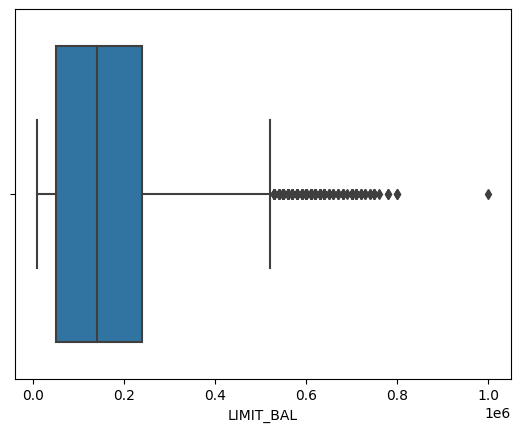

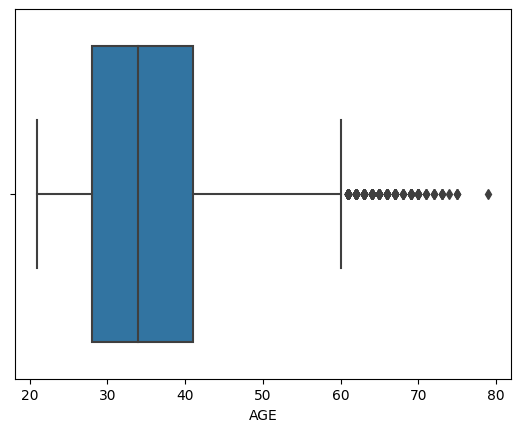

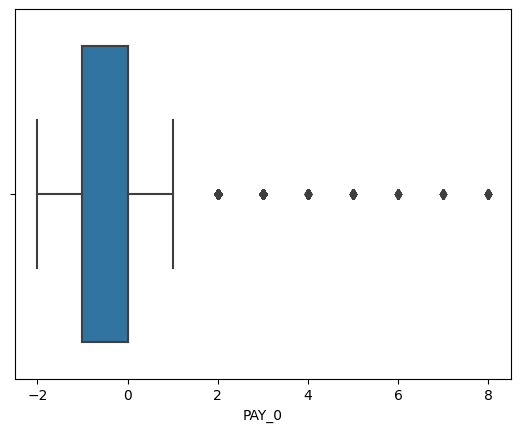

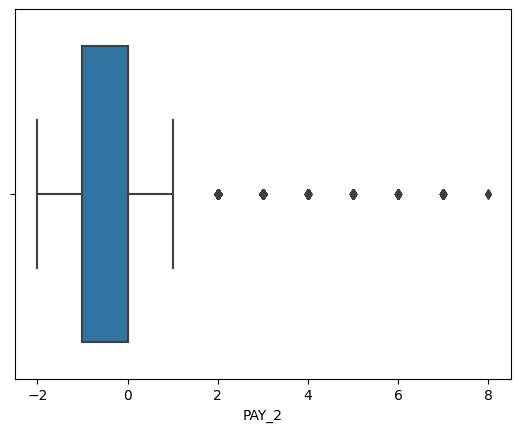

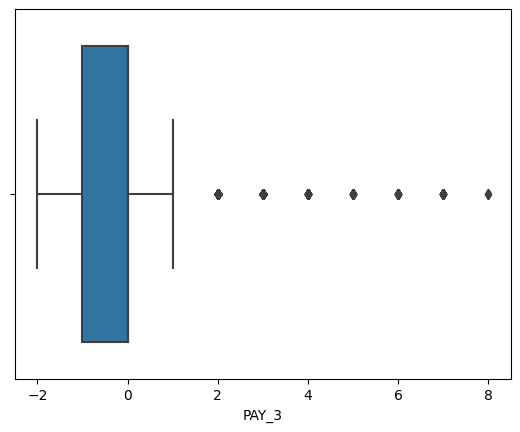

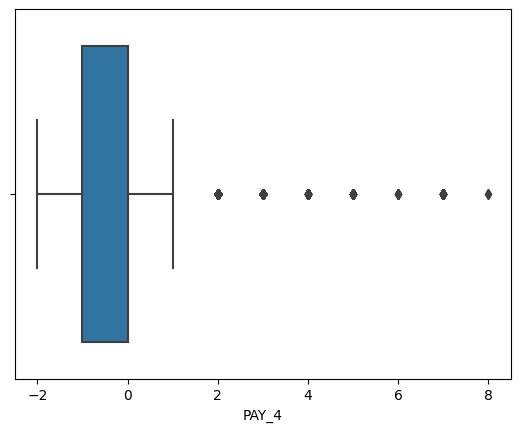

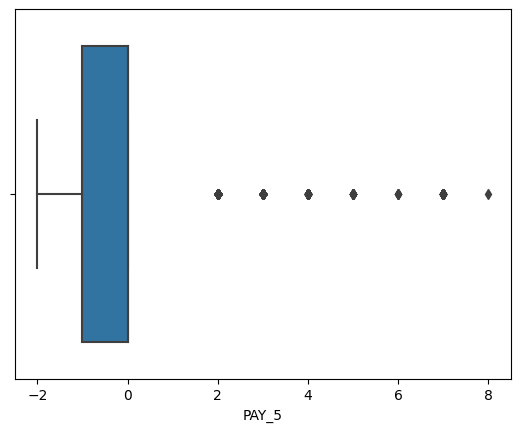

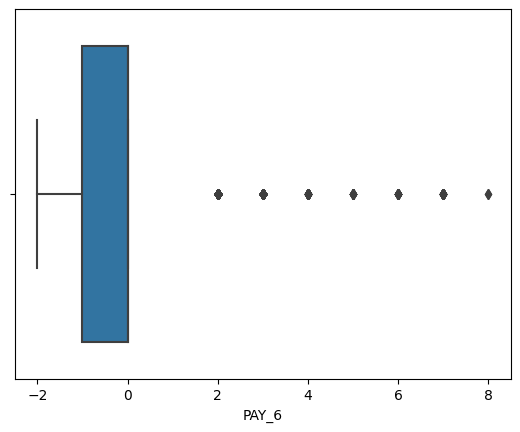

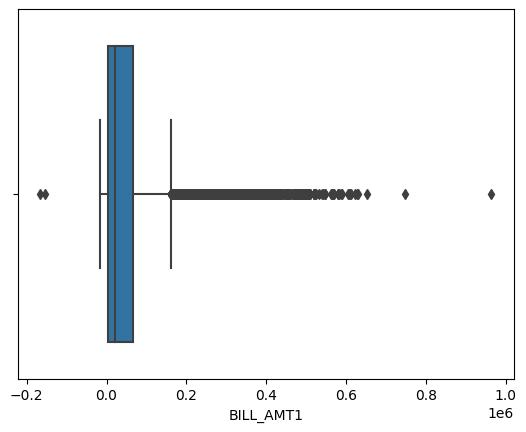

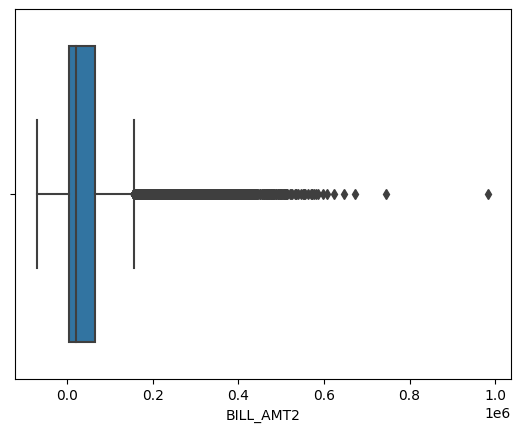

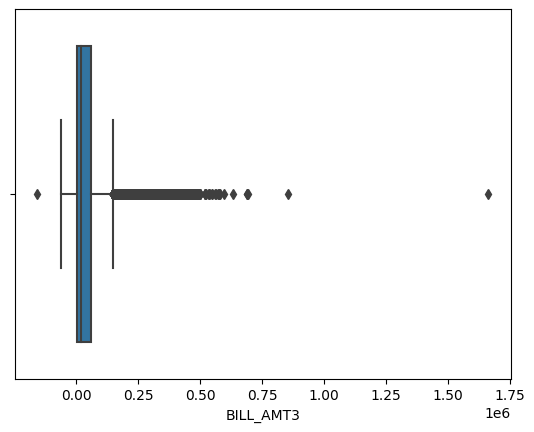

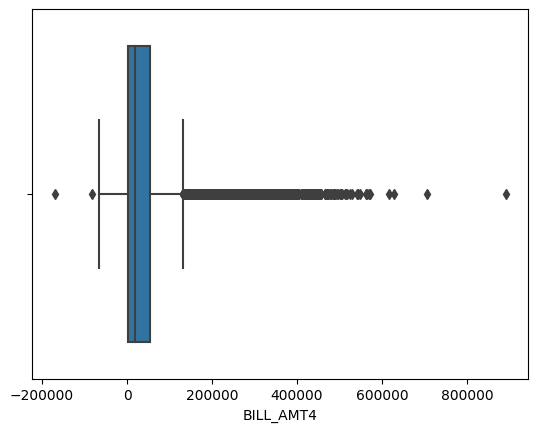

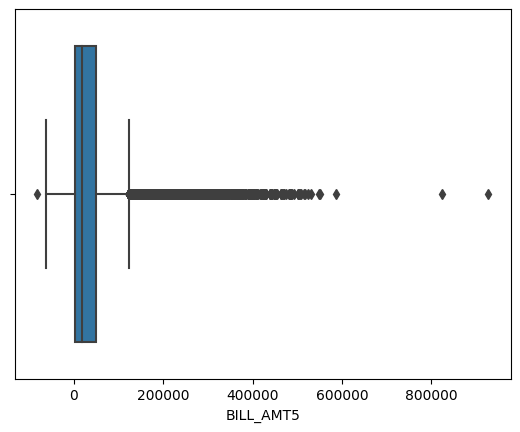

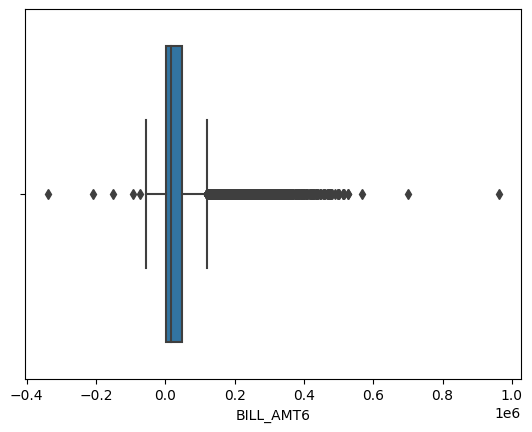

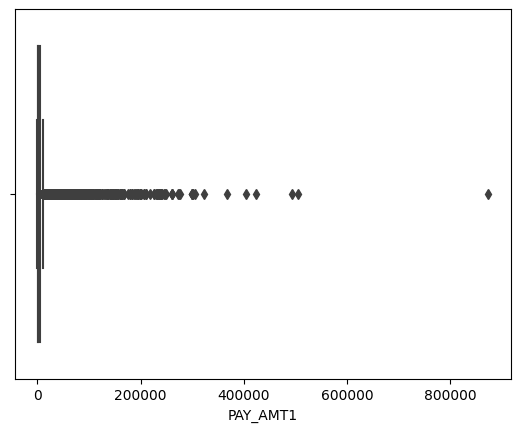

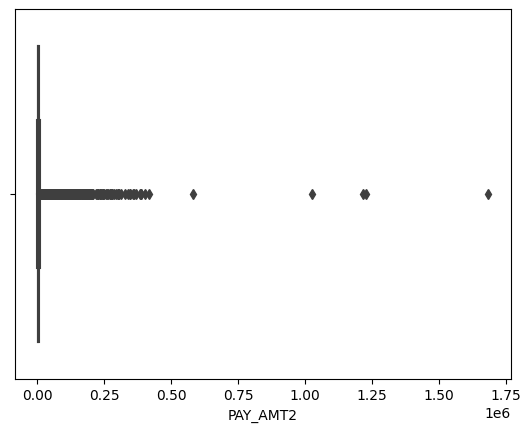

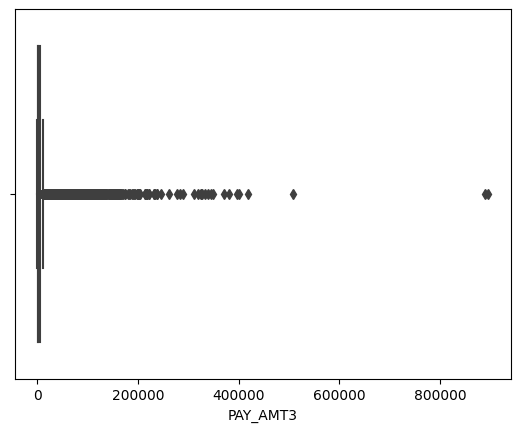

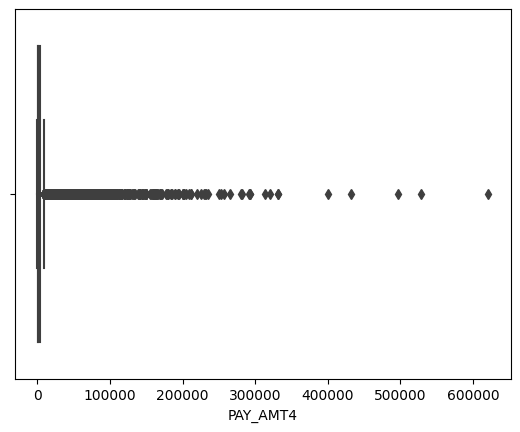

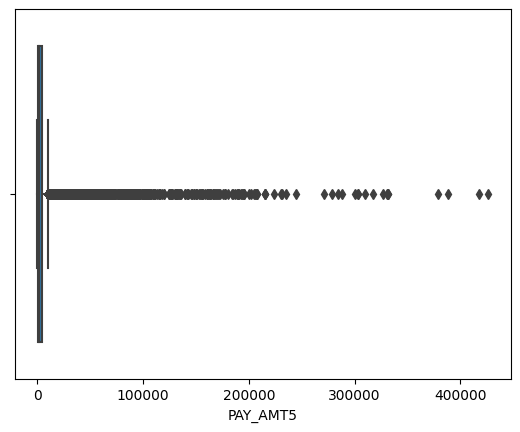

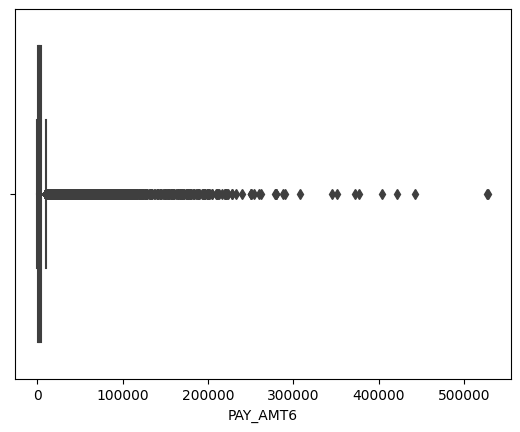

In [69]:
for c in df_no_cats.columns:
    sns.boxplot(df_no_cats, x=c)
    plt.show()
    plt.close()


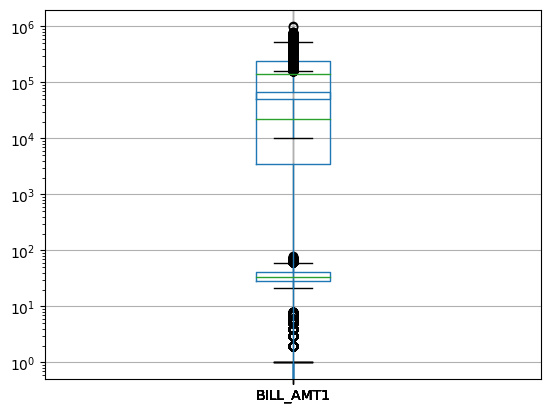

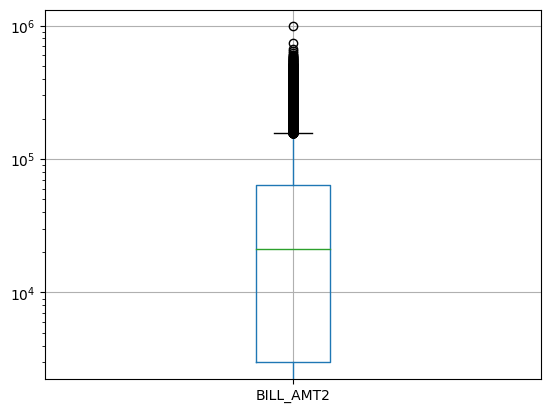

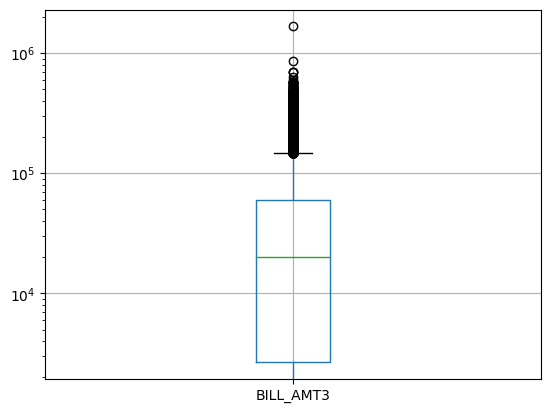

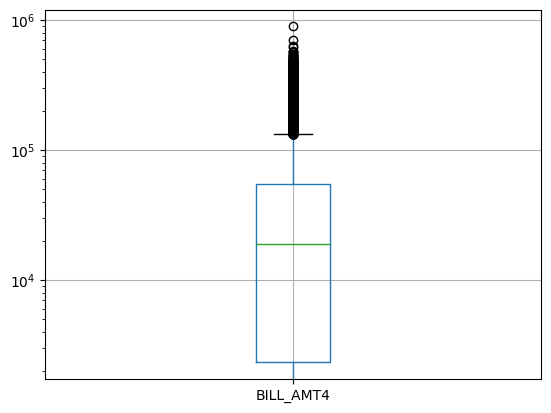

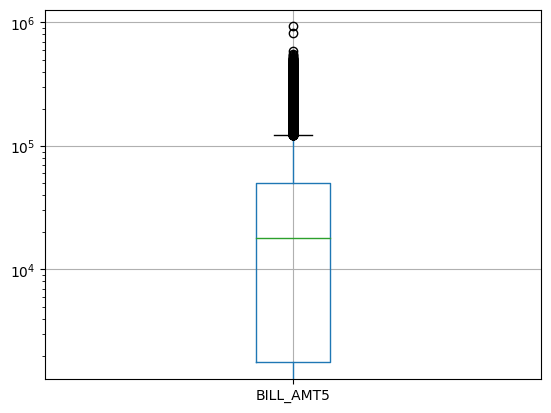

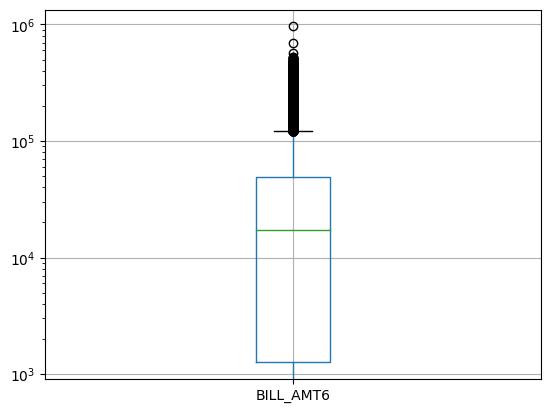

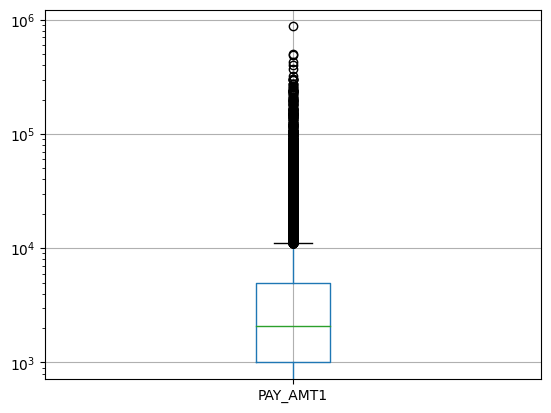

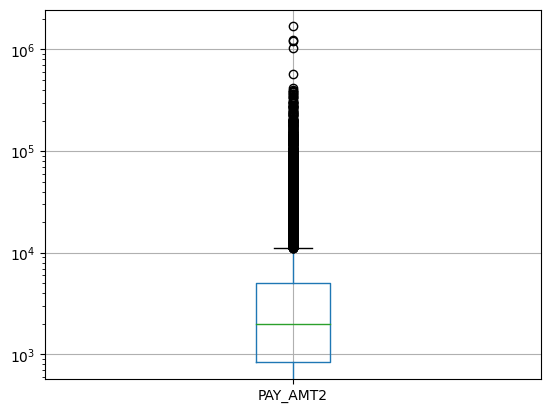

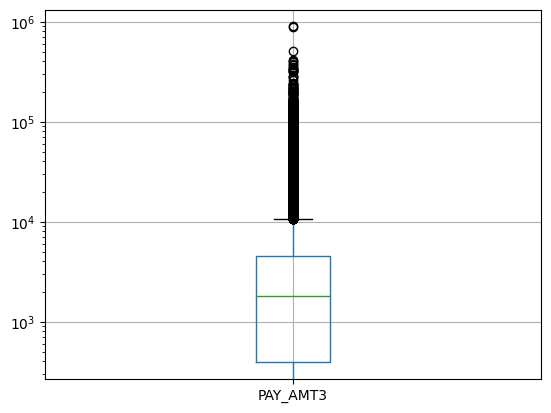

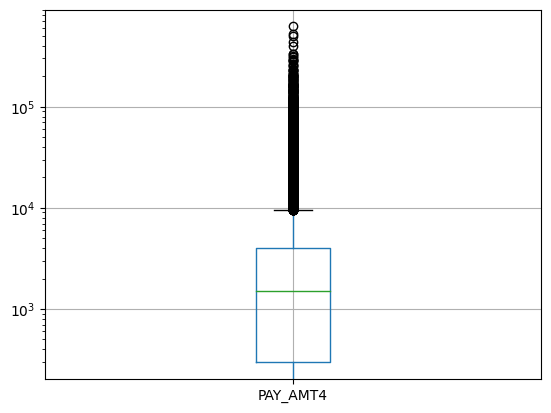

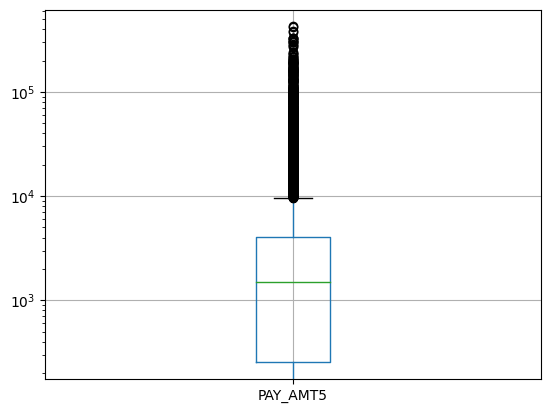

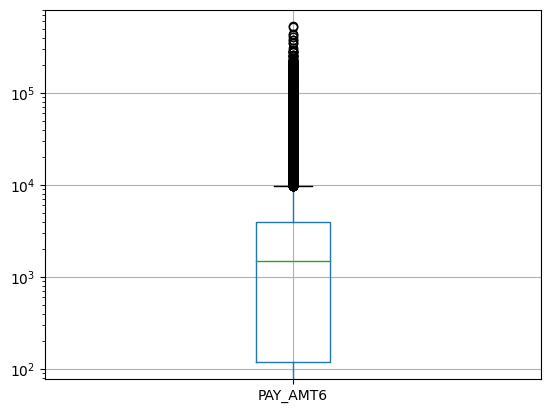

In [70]:
for c in df_no_cats.columns:
    ax = df_no_cats.boxplot(c)
    if c.startswith('BILL_AMT') or c.startswith('PAY_AMT'):
        ax.set_yscale("log")
        plt.show()
        plt.close()


## Histograms

This graph will show the frequency distributions, it will be possible to identify if each feature is a Gaussian distribution or not


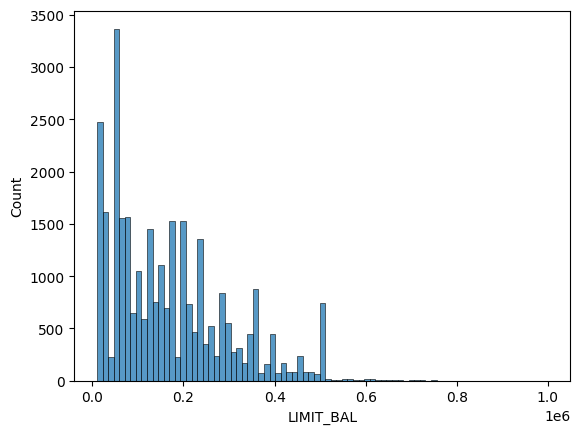

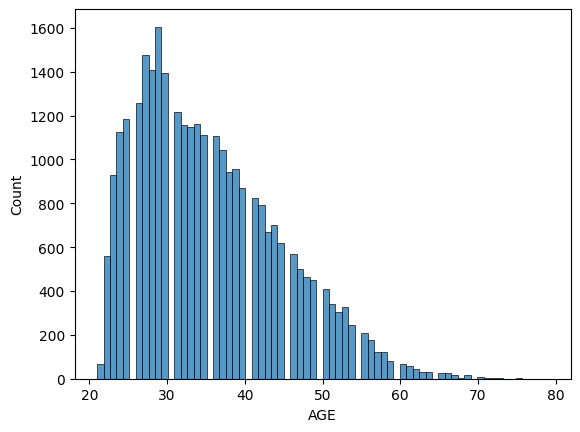

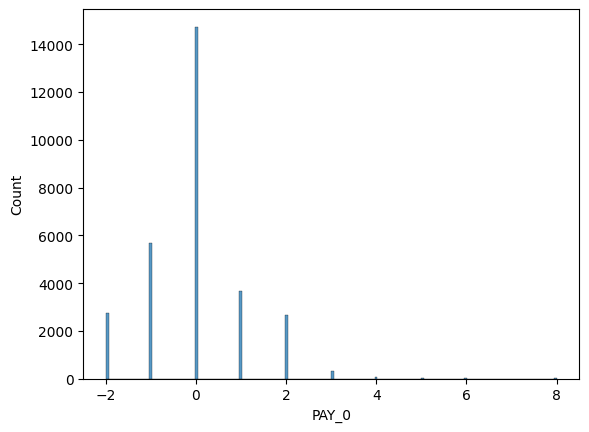

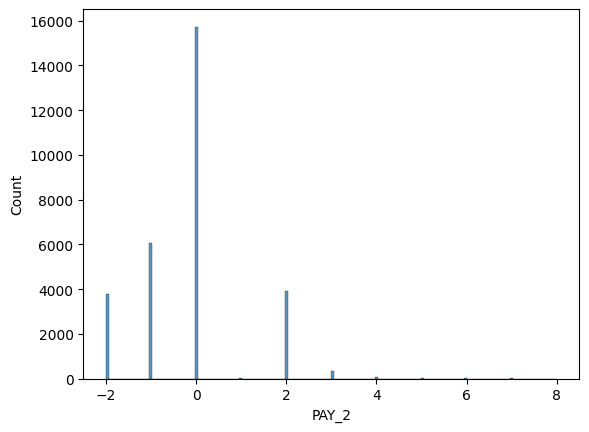

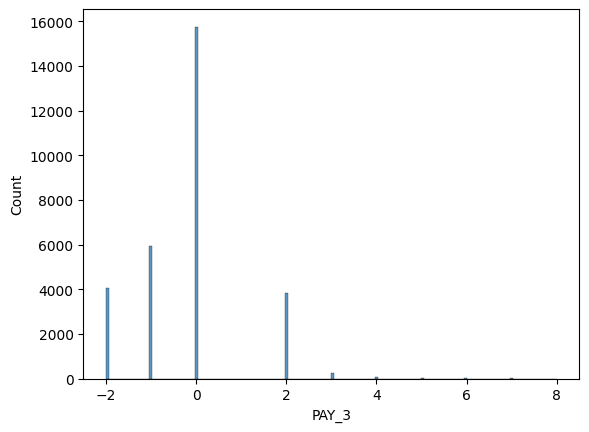

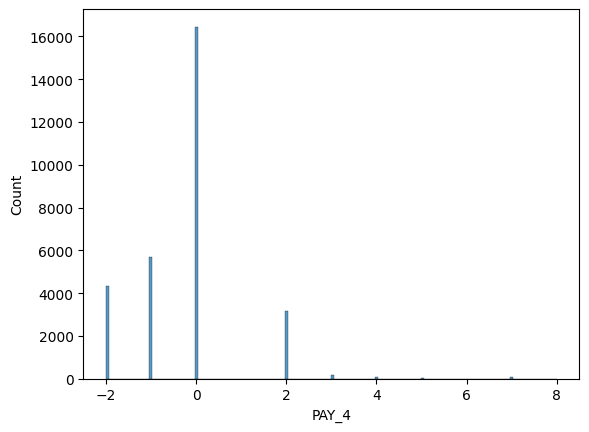

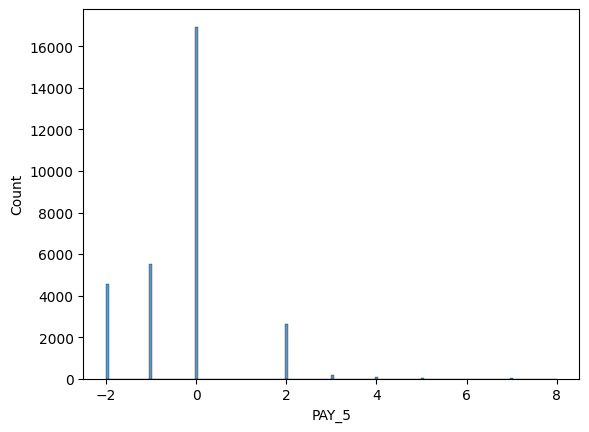

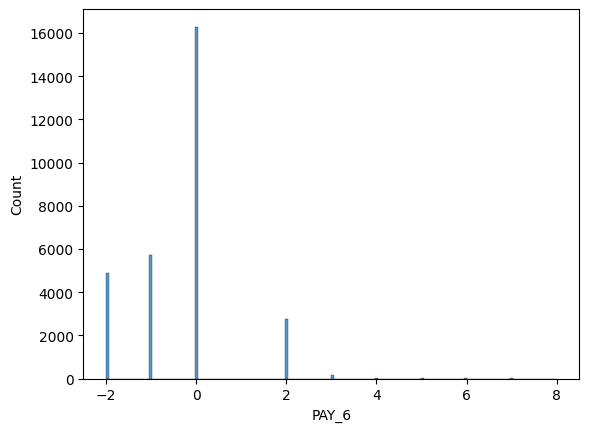

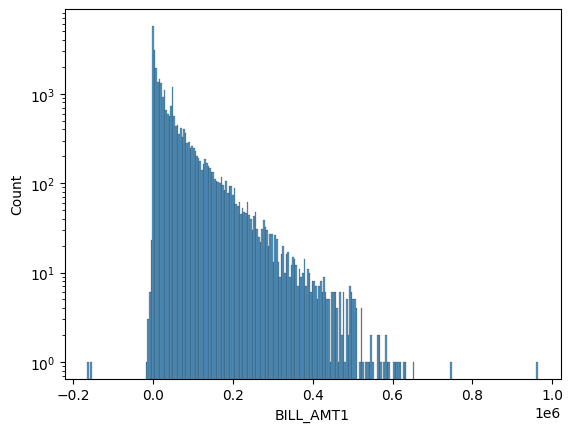

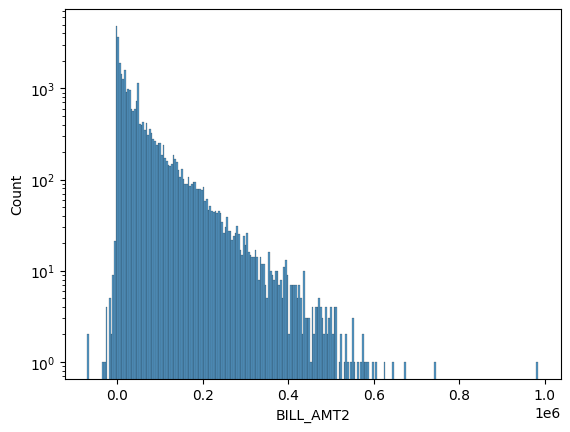

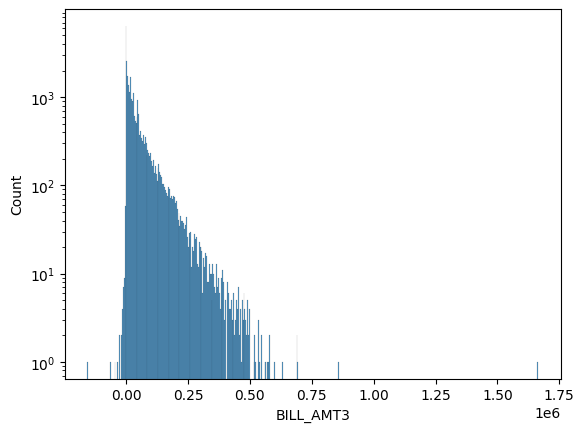

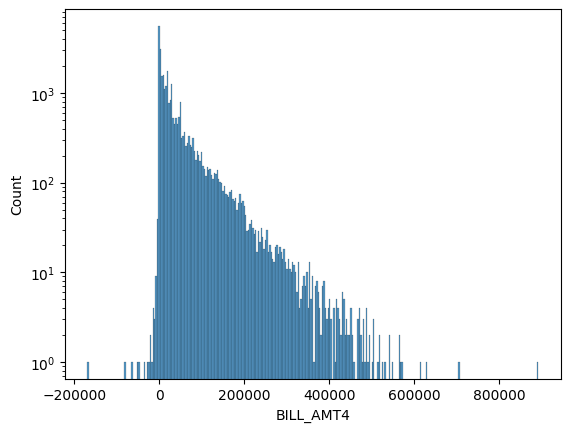

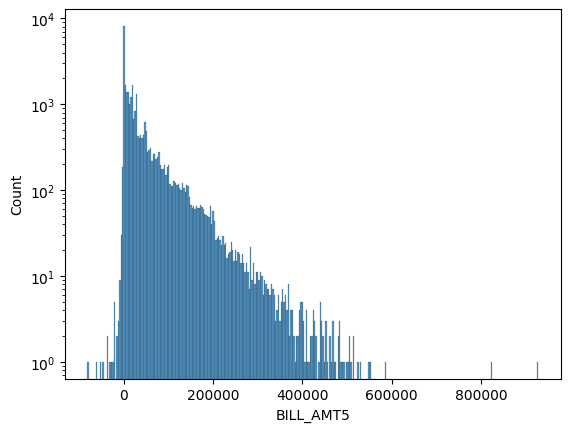

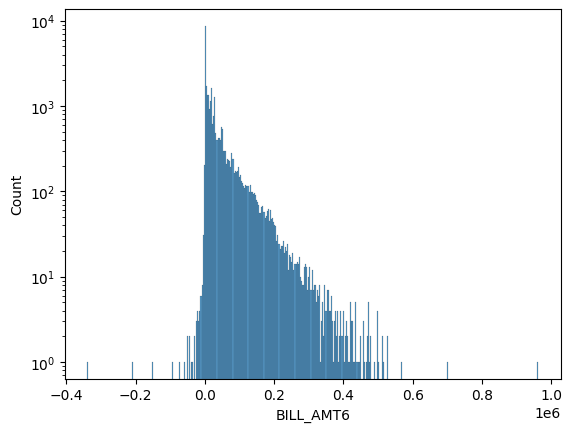

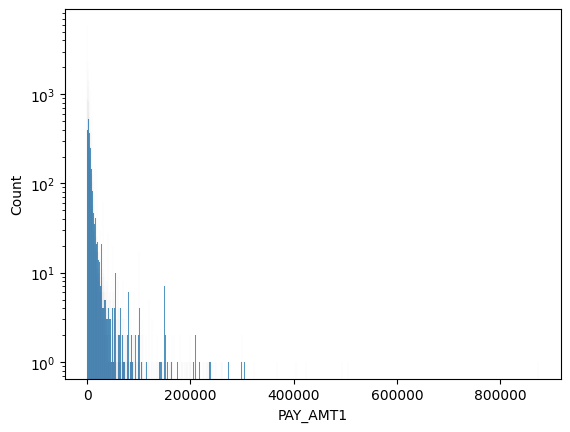

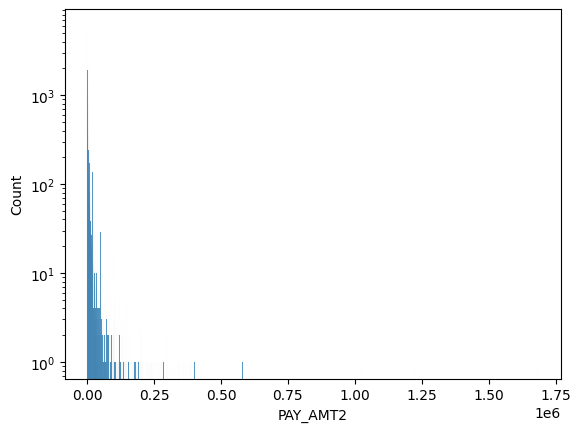

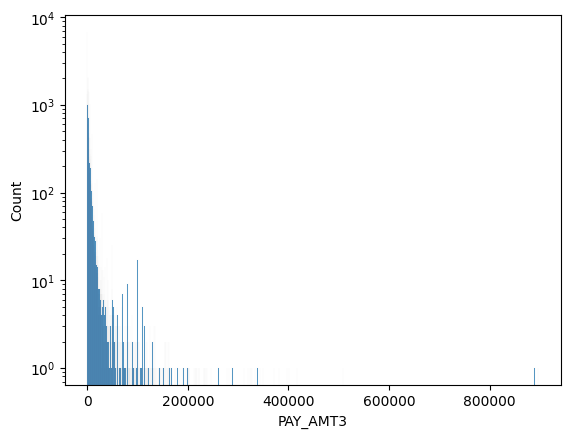

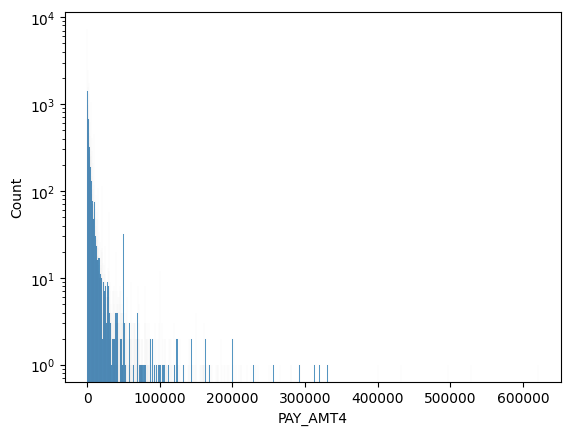

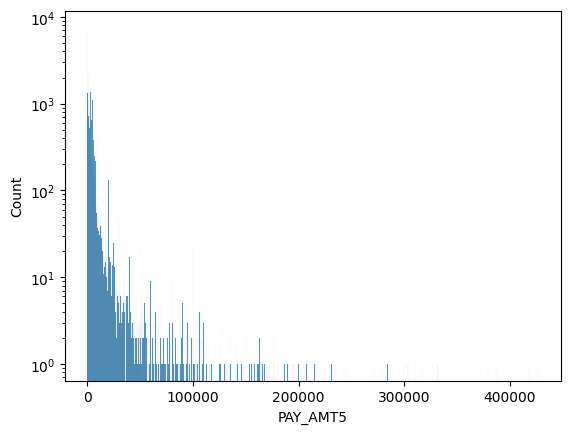

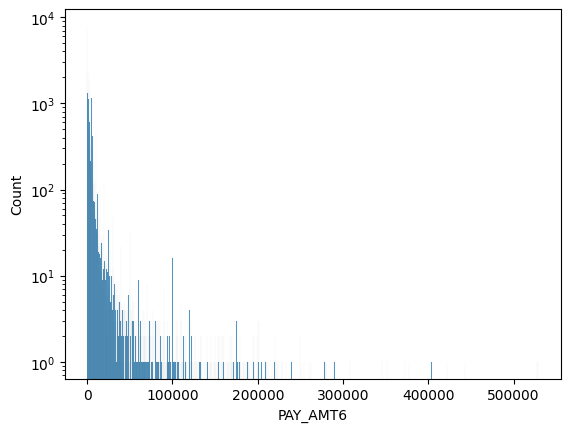

In [67]:
for c in df_no_cats.columns:
    ax = sns.histplot(df_no_cats, x=c)
    if c.startswith('BILL_AMT') or c.startswith('PAY_AMT'):
        ax.set_yscale("log")
    plt.show()
    plt.close()


## Plotting a diagonal correlation matrix

This diagram will show the correlation of each feature individually


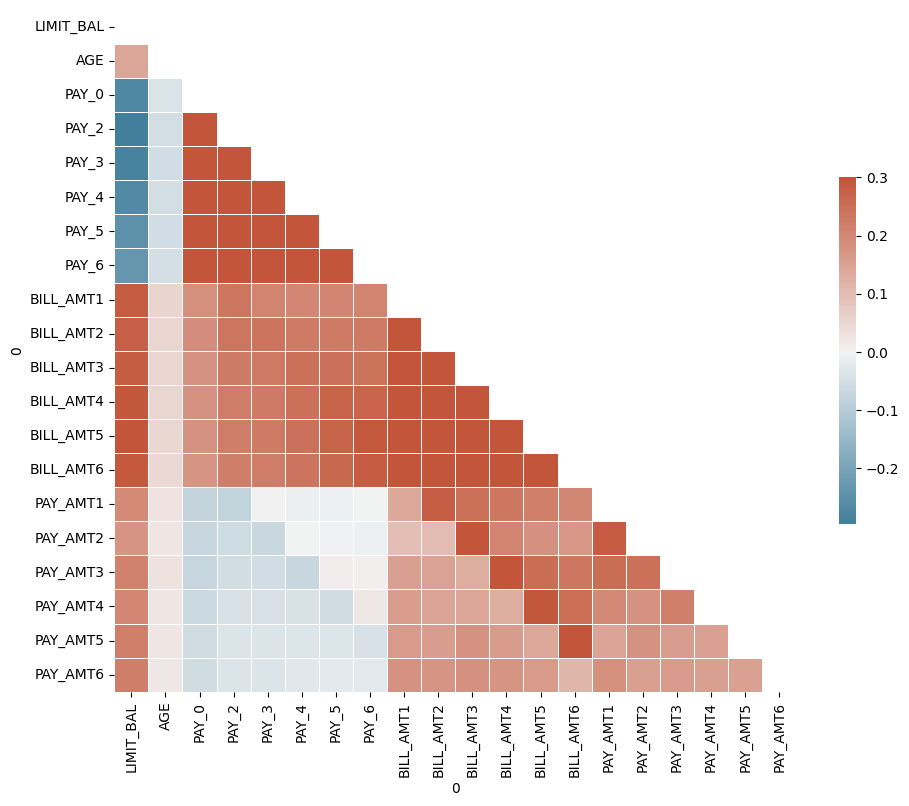

In [32]:
corr = df_no_cats.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### Dummies Variables and Categorical Data

Dummy variables enable us to use a single regression equation to represent multiple groups


In [38]:
pd.get_dummies(df_cats.drop(['default payment next month'], axis=1)).head()

,SEX_1.0,SEX_2.0,MARRIAGE_0.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,EDUCATION_0.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0
0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0


In [42]:
df2 = pd.concat([df_no_cats, pd.get_dummies(df_cats.drop(['default payment next month'], axis=1))], axis=1)
df2.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,SEX_2.0,MARRIAGE_0.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,EDUCATION_0.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,...,1,0,1,0,0,0,0,1,0,0,0,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,...,1,0,0,1,0,0,0,1,0,0,0,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,...,1,0,0,1,0,0,0,1,0,0,0,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,...,1,0,1,0,0,0,0,1,0,0,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,...,0,0,1,0,0,0,0,1,0,0,0,0


In [43]:
df2.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,...,SEX_2.0,MARRIAGE_0.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,EDUCATION_0.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,...,0.603733,0.001800,0.455300,0.532133,0.010767,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,...,0.489129,0.042389,0.498006,0.498975,0.103204,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
